---
title: GSB - S544 Lab 5
author: Karissa Mohr
format:
  html:
    embed-resources: true
echo: true
theme: lux
---

## Part One: Data Exploration
The dataset we will study for this assignment contains information about health insurance costs for individuals with no dependents (children) in the United States. The information contained in the data is:

* Age of primary beneficiary

* Gender of primary beneficiary (only female, male recorded)

* Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* Whether the beneficiary smokes

The beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

Individual medical costs billed by health insurance

You can find this data at: https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1

Read in the dataset, and display some summaries of the data.

Fix any concerns you have about the data.

Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.



In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
insurance = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
insurance

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692
...,...,...,...,...,...,...
426,23,female,33.400,no,southwest,10795.93733
427,18,female,31.920,no,northeast,2205.98080
428,18,female,36.850,no,southeast,1629.83350
429,21,female,25.800,no,southwest,2007.94500


In [5]:
insurance.dtypes

,0
age,int64
sex,object
bmi,float64
smoker,object
region,object
charges,float64


In [6]:
insurance = insurance.dropna()

In [8]:
from plotnine import *

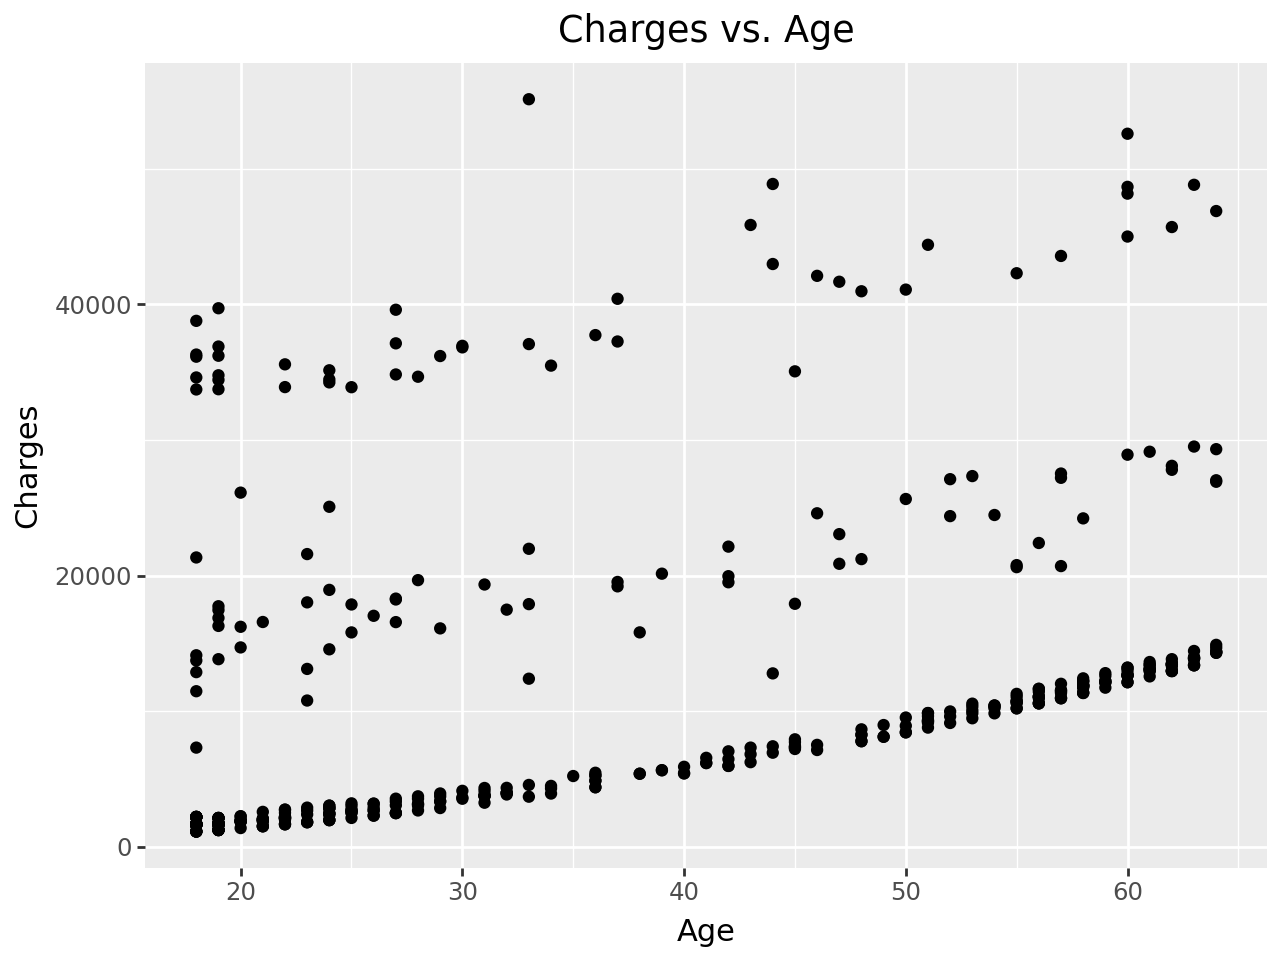

In [61]:
# charges v age
(ggplot(insurance, aes(x="age", y="charges"))
  + geom_point()
  + labs(
        title="Charges vs. Age",
        x="Age",
        y="Charges"
    )
)


It looks like as age increases, so does cost.

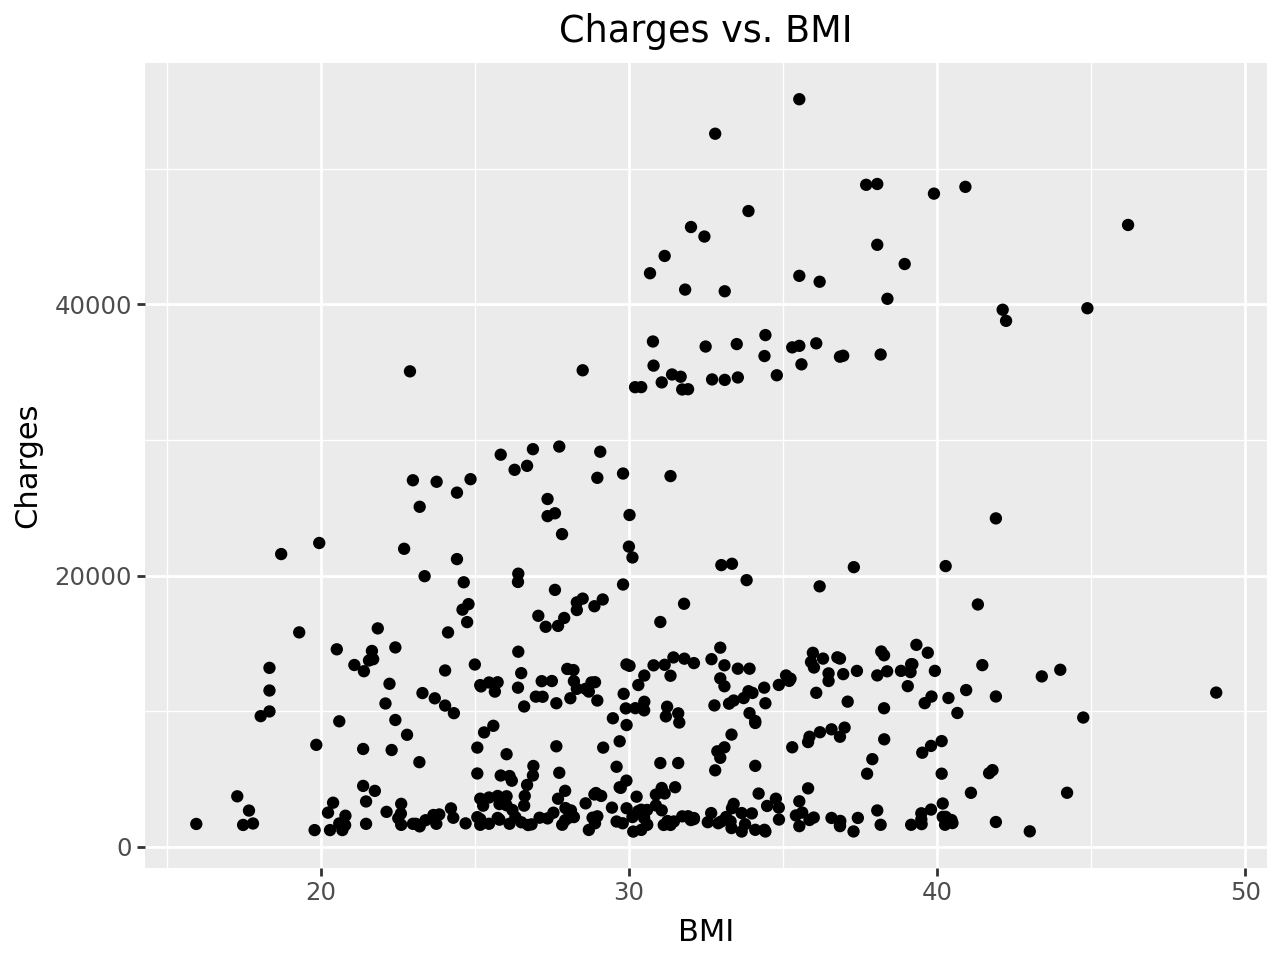

In [60]:
# charges v bmi
(ggplot(insurance, aes(x="bmi", y="charges"))
  + geom_point()
  + labs(
        title="Charges vs. BMI",
        x="BMI",
        y="Charges"
    )
)

I can't tell if there's a strong correlation but there might be a slight relationship between higher BMI leading to higher costs. If there is, it's not a linear relationship.

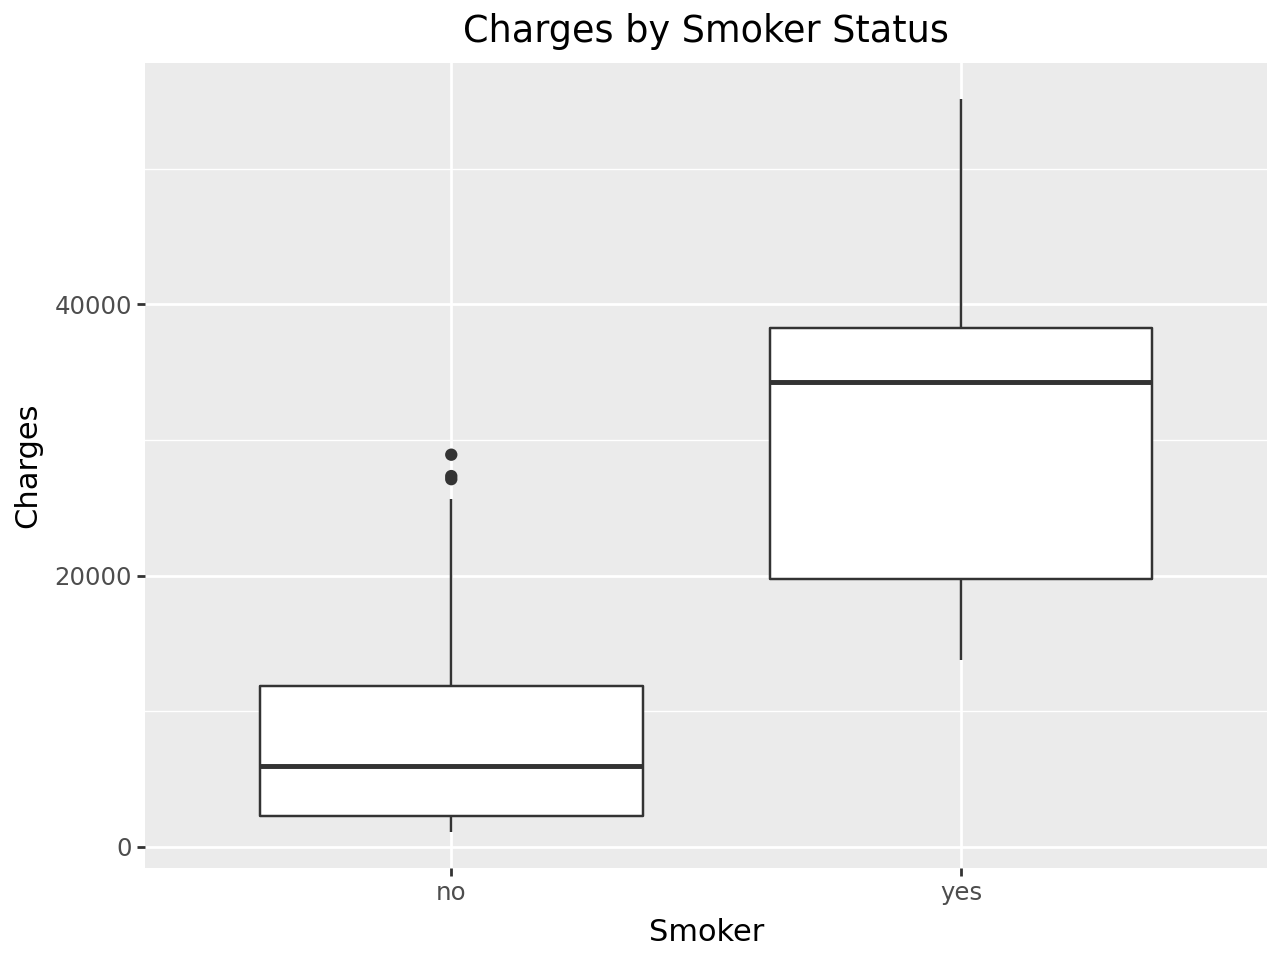

In [15]:
# charges v smoker status
(ggplot(insurance, aes(x="smoker", y="charges"))
+ geom_boxplot()
+ labs(
        title="Charges by Smoker Status",
        x="Smoker",
        y="Charges"
    )
)

People who are smokers have higher insurance costs.

## Part Two: Simple Linear Models
1. Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

2. Make a model that also incorporates the variable sex. Report your results.

3. Now make a model that does not include sex, but does include smoker. Report your results.

4. Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.



In [16]:
# Q1: Model 1
X1 = insurance[["age"]]
y = insurance["charges"]

model1 = LinearRegression()
model1.fit(X1, y)


LinearRegression()

In [23]:
model1.intercept_

np.float64(3611.758798507106)

The esitmated insurance cost for someone who is 0 years old.

In [17]:
model1.coef_[0]

np.float64(228.79904937243666)

In [58]:
yhat = model1.predict(X1)
mse = mean_squared_error(y, yhat)
r2 = r2_score(y, yhat)

In [59]:
print("Model 1")
print("MSE:", round(mse, 2))
print("R-squared:", round(r2, 3))

Model 1
MSE: 126739267.91
R-squared: 0.099


As age increases, insurance cost increases by $228.80 each year.

The model shows a positive linear relationship between age and insurance charges, indicating that for each additional year of age, charges increase by 228.80, with a baseline of 3611.76.

In [35]:
# Q2: Model 2
insurance["sex_male"] = pd.get_dummies(insurance["sex"])["male"] * 1

In [36]:
insurance

,age,sex,bmi,smoker,region,charges,sex_male
0,19,female,27.900,yes,southwest,16884.92400,0
1,33,male,22.705,no,northwest,21984.47061,1
2,32,male,28.880,no,northwest,3866.85520,1
3,31,female,25.740,no,southeast,3756.62160,0
4,60,female,25.840,no,northwest,28923.13692,0
...,...,...,...,...,...,...,...
426,23,female,33.400,no,southwest,10795.93733,0
427,18,female,31.920,no,northeast,2205.98080,0
428,18,female,36.850,no,southeast,1629.83350,0
429,21,female,25.800,no,southwest,2007.94500,0


In [50]:
X2 = insurance[["age", "sex_male"]]
y = insurance["charges"]

In [51]:
model2 = LinearRegression()
model2.fit(X2, y)

LinearRegression()

In [39]:
model2.intercept_

np.float64(3315.3323465342655)

The intercept for the model when both age and sex are 0

In [41]:
model2.coef_[0]

np.float64(228.4258623585593)

The coefficient for age is $228.43. This means that for every year aged, insurance increases by 228.43 holding sex constant.

In [42]:
model2.coef_[1]

np.float64(649.8325899725361)

The coefficient for males is $649.83, meaning they have 649.83 higher costs than females, holding age constant.

In [43]:
# Q3: Model 3
insurance["smoker_yes"] = pd.get_dummies(insurance["smoker"])["yes"] * 1

In [44]:
insurance

,age,sex,bmi,smoker,region,charges,sex_male,smoker_yes
0,19,female,27.900,yes,southwest,16884.92400,0,1
1,33,male,22.705,no,northwest,21984.47061,1,0
2,32,male,28.880,no,northwest,3866.85520,1,0
3,31,female,25.740,no,southeast,3756.62160,0,0
4,60,female,25.840,no,northwest,28923.13692,0,0
...,...,...,...,...,...,...,...,...
426,23,female,33.400,no,southwest,10795.93733,0,0
427,18,female,31.920,no,northeast,2205.98080,0,0
428,18,female,36.850,no,southeast,1629.83350,0,0
429,21,female,25.800,no,southwest,2007.94500,0,0


In [52]:
X3 = insurance[["age", "smoker_yes"]]
y = insurance["charges"]

model3 = LinearRegression()
model3.fit(X3, y)

LinearRegression()

In [46]:
model3.intercept_

np.float64(-2166.852295375431)

The intercept for the model when both age and smoker_yes are 0

In [47]:
model3.coef_[0]

np.float64(253.14535548828445)

The coefficient for age is $253.15 This means that for every year aged, insurance increases by 253.15 holding smoker constant.

In [48]:
model3.coef_[1]

np.float64(24048.86743795388)

The coefficient for smokers is $24,048.87, meaning they have 24,048.87 higher costs than non-smokers, holding age constant.

In [62]:
# Q4: Compare Models

# Model 2
yhat2 = model2.predict(X2)
mse2 = mean_squared_error(y, yhat2)
r2_2 = r2_score(y, yhat2)

# Model 3
yhat3 = model3.predict(X3)
mse3 = mean_squared_error(y, yhat3)
r2_3 = r2_score(y, yhat3)

In [54]:
print("Model 2")
print("MSE:", round(mse2, 2))
print("R-squared:", round(r2_2, 3))
print()

print("Model 3")
print("MSE:", round(mse3, 2))
print("R-squared:", round(r2_3, 3))

Model 2
MSE: 126633939.68
R-squared: 0.1

Model 3
MSE: 33719831.47
R-squared: 0.76


 Model 3 is better than Model 2 because it has a higher R-squared and the MSE is lower. This means that Model 3 is a better fit and that smoker status is a stronger predictor than sex.

## Part Three: Multiple Linear Models
Now let’s consider including multiple quantitative predictors.

1. Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

6. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

In [64]:
# Q1: Model 4
X4 = insurance[["age", "bmi"]]
y = insurance["charges"]

model4 = LinearRegression()
model4.fit(X4, y)

LinearRegression()

In [65]:
yhat4 = model4.predict(X4)
mse4 = mean_squared_error(y, yhat4)
r2_4 = r2_score(y, yhat4)

print("MSE:", round(mse4, 2))
print("R-squared:", round(r2_4, 3))

MSE: 123792439.58
R-squared: 0.12


The R-squared is higher than Model 1, and the MSE is lower, but not by much.

In [63]:
# Q2: Model 4 Squared
insurance["age_sq"] = insurance["age"] ** 2

In [66]:
X5 = insurance[["age", "age_sq"]]

model5 = LinearRegression()
model5.fit(X5, y)

LinearRegression()

In [67]:
yhat5 = model5.predict(X5)
mse5 = mean_squared_error(y, yhat5)
r2_5 = r2_score(y, yhat5)

print("MSE:", round(mse5, 2))
print("R-squared:", round(r2_5, 3))

MSE: 126710293.81
R-squared: 0.1


The MSE is very slightly lower than Model 1, and the R-squared is barely higher than Model 1.

In [ ]:
# Q3: Degree 4

In [68]:
insurance["age_cube"] = insurance["age"] ** 3
insurance["age_quad"] = insurance["age"] ** 4

X6 = insurance[["age", "age_sq", "age_cube", "age_quad"]]

model6 = LinearRegression()
model6.fit(X6, y)

LinearRegression()

In [69]:
yhat6 = model6.predict(X6)
mse6 = mean_squared_error(y, yhat6)
r2_6 = r2_score(y, yhat6)

print("MSE:", round(mse6, 2))
print("R-squared:", round(r2_6, 3))

MSE: 125550389.65
R-squared: 0.108


The MSE is lower than Model 1 and the R-squared is higher.

In [70]:
# Q4: Degree 12
insurance["age_5"] = insurance["age"] ** 5
insurance["age_6"] = insurance["age"] ** 6
insurance["age_7"] = insurance["age"] ** 7
insurance["age_8"] = insurance["age"] ** 8
insurance["age_9"] = insurance["age"] ** 9
insurance["age_10"] = insurance["age"] ** 10
insurance["age_11"] = insurance["age"] ** 11
insurance["age_12"] = insurance["age"] ** 12

X7 = insurance[
    ["age", "age_sq", "age_cube", "age_quad",
     "age_5", "age_6", "age_7", "age_8",
     "age_9", "age_10", "age_11", "age_12"]
]

In [71]:
model7 = LinearRegression()
model7.fit(X7, y)

LinearRegression()

In [72]:
yhat7 = model7.predict(X7)
mse7 = mean_squared_error(y, yhat7)
r2_7 = r2_score(y, yhat7)

print("MSE:", round(mse7, 2))
print("R-squared:", round(r2_7, 3))

MSE: 125373053.69
R-squared: 0.109


The MSE slightly decreasesd and the R-squared slightly increased but barely.

In [76]:
# Q5: Best Model

print("Model 1:", round(mse, 2), round(r2_1,3))
print("Model 4:", round(mse4, 2), round(r2_4,3))
print("Model 5:", round(mse5, 2), round(r2_5,3))
print("Model 6:", round(mse6, 2), round(r2_6,3))
print("Model 7:", round(mse7, 2), round(r2_7,3))

Model 1: 126739267.91 0.099
Model 4: 123792439.58 0.12
Model 5: 126710293.81 0.1
Model 6: 125550389.65 0.108
Model 7: 125373053.69 0.109


Model 4 is the best fit because it has the lowest MSE and highest R-Squared. Also, the degree 12 model would most likely be overfitting/too complicated and adding more degrees is barely improving the MSE and R-Squared anyways.

In [77]:
# Q6: Plot
plot = pd.DataFrame({
    "age": insurance["age"],
    "charges": insurance["charges"],
    "y_hat": yhat7
})

In [78]:
plot = plot.sort_values("age")

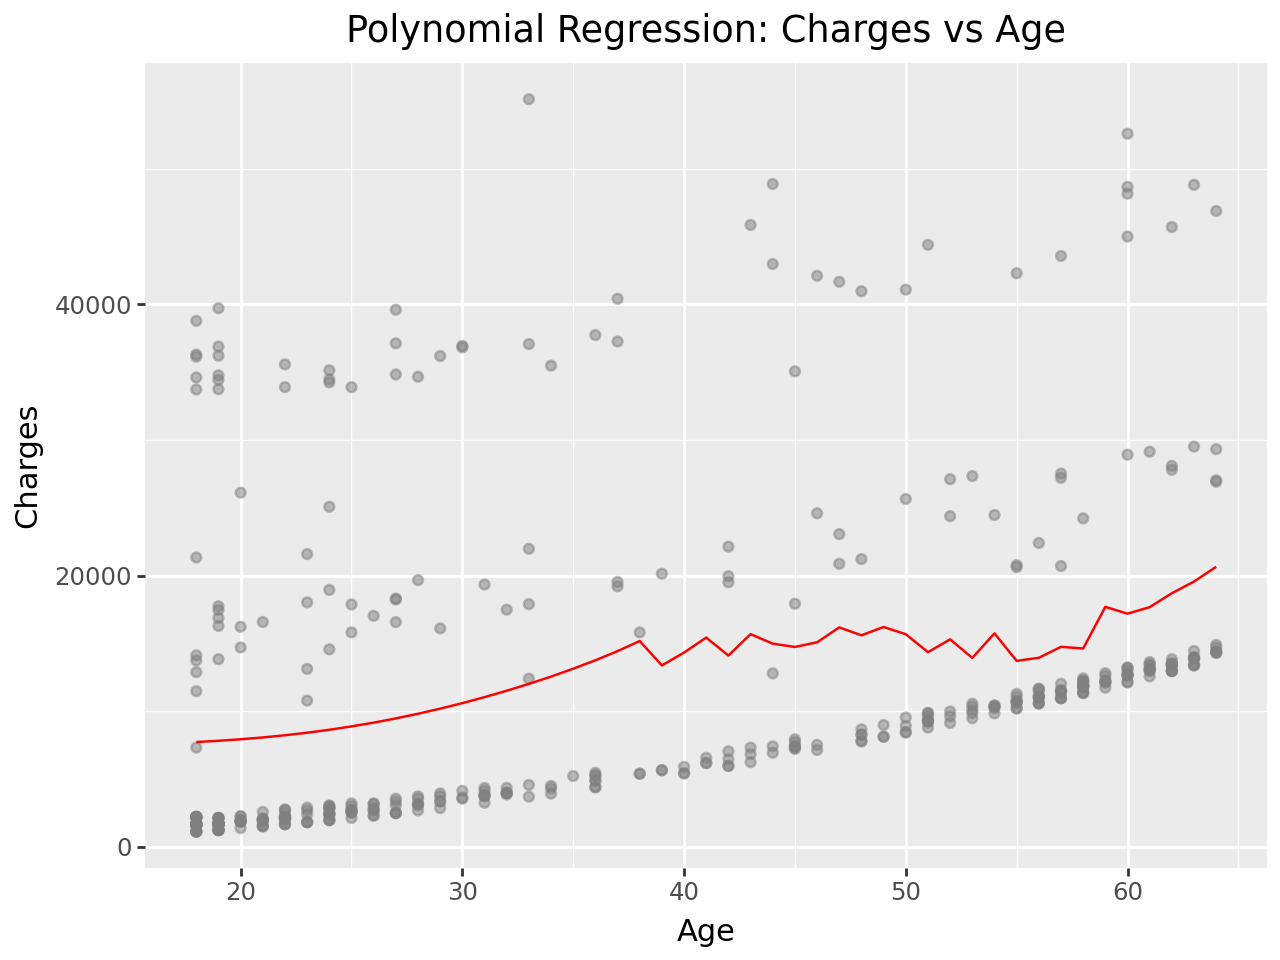

In [80]:
(ggplot(plot, aes(x="age", y="charges"))
    + geom_point(alpha=0.5, color="gray")
    + geom_line(aes(y="y_hat"), color="red")
    + labs(
        title="Polynomial Regression: Charges vs Age",
        x="Age",
        y="Charges"
    )
)

## Part Four: New data
Great news! We’ve managed to collect data about the insurance costs for a few more individuals. You can find the new dataset here: https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1

Consider the following possible models:

* Only age as a predictor.

* age and bmi as a predictor.

* age, bmi, and smoker as predictors (no interaction terms)

* age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)

* age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

For each model, fit the model on the original data.

Then, use the fitted model to predict on the new data.

Report the MSE for each model’s new predictions. Based on this, which is the best model to use?

Make a plot showing the residuals of your final chosen model.

In [81]:
insurance2 = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")
insurance2

,age,sex,bmi,smoker,region,charges
0,23,male,34.400,no,southwest,1826.84300
1,56,male,40.300,no,southwest,10602.38500
2,18,male,34.100,no,southeast,1137.01100
3,63,female,23.085,no,northeast,14451.83515
4,63,male,28.310,no,northwest,13770.09790
...,...,...,...,...,...,...
138,19,male,34.900,yes,southwest,34828.65400
139,45,male,30.360,yes,southeast,62592.87309
140,43,male,27.800,yes,southwest,37829.72420
141,24,female,27.720,no,southeast,2464.61880


In [83]:
insurance2 = insurance2.dropna()

In [84]:
insurance2["smoker_yes"] = pd.get_dummies(insurance2["smoker"])["yes"] * 1

In [85]:
y_train = insurance["charges"]
y_new = insurance2["charges"]

In [86]:
# Model 1: Age
X_train1 = insurance[["age"]]
X_new1 = insurance2[["age"]]

model1 = LinearRegression()
model1.fit(X_train1, y_train)
yhat_new1 = model1.predict(X_new1)

mse_new1 = mean_squared_error(y_new, yhat_new1)
print("MSE:", round(mse_new1, 2))


MSE: 136077136.5


In [87]:
# Model 2: Age and BMI
X_train2 = insurance[["age", "bmi"]]
X_new2 = insurance2[["age", "bmi"]]

model2 = LinearRegression()
model2.fit(X_train2, y_train)
yhat_new2 = model2.predict(X_new2)

mse_new2 = mean_squared_error(y_new, yhat_new2)
print("MSE:", round(mse_new2, 2))


MSE: 132636406.11


In [88]:
# Model 3: Age, BMI, Smoker
X_train3 = insurance[["age", "bmi", "smoker_yes"]]
X_new3 = insurance2[["age", "bmi", "smoker_yes"]]

model3 = LinearRegression()
model3.fit(X_train3, y_train)
yhat_new3 = model3.predict(X_new3)

mse_new3 = mean_squared_error(y_new, yhat_new3)
print("MSE:", round(mse_new3, 2))

MSE: 35377541.24


In [89]:
# Model 4: ~ (age + bmi):smoker
# interaction terms
insurance["age_smoker"] = insurance["age"] * insurance["smoker_yes"]
insurance["bmi_smoker"] = insurance["bmi"] * insurance["smoker_yes"]

insurance2["age_smoker"] = insurance2["age"] * insurance2["smoker_yes"]
insurance2["bmi_smoker"] = insurance2["bmi"] * insurance2["smoker_yes"]

In [90]:
X_train4 = insurance[["age_smoker", "bmi_smoker"]]
X_new4   = insurance2[["age_smoker", "bmi_smoker"]]
y_train  = insurance["charges"]
y_new    = insurance2["charges"]

model4 = LinearRegression()
model4.fit(X_train4, y_train)

yhat_new4 = model4.predict(X_new4)
mse_new4  = mean_squared_error(y_new, yhat_new4)

print("MSE:", round(mse_new4, 2))

MSE: 47626025.36


In [91]:
# Model 5: ~ (age + bmi)*smoker
X_train5 = insurance[["age", "bmi", "smoker_yes", "age_smoker", "bmi_smoker"]]
X_new5   = insurance2[["age", "bmi", "smoker_yes", "age_smoker", "bmi_smoker"]]
y_train  = insurance["charges"]
y_new    = insurance2["charges"]

model5 = LinearRegression()
model5.fit(X_train5, y_train)

yhat_new5 = model5.predict(X_new5)
mse_new5  = mean_squared_error(y_new, yhat_new5)

print("MSE:", round(mse_new5, 2))

MSE: 21786256.87


In [92]:
# Compare Models
print("Model 1:", round(mse_new1, 2))
print("Model 2:", round(mse_new2, 2))
print("Model 3:", round(mse_new3, 2))
print("Model 4:", round(mse_new4, 2))
print("Model 5:", round(mse_new5, 2))


Model 1: 136077136.5
Model 2: 132636406.11
Model 3: 35377541.24
Model 4: 47626025.36
Model 5: 21786256.87


Model 5 is the best because it has the lowest MSE by far and has a good amount of complexity with the interaction terms.

In [99]:
# Plot
plot2 = pd.DataFrame({
    "age": insurance2["age"],
    "charges": insurance2["charges"],
    "y_hat": yhat_new5
})

In [102]:
plot2 = plot2.sort_values("age")

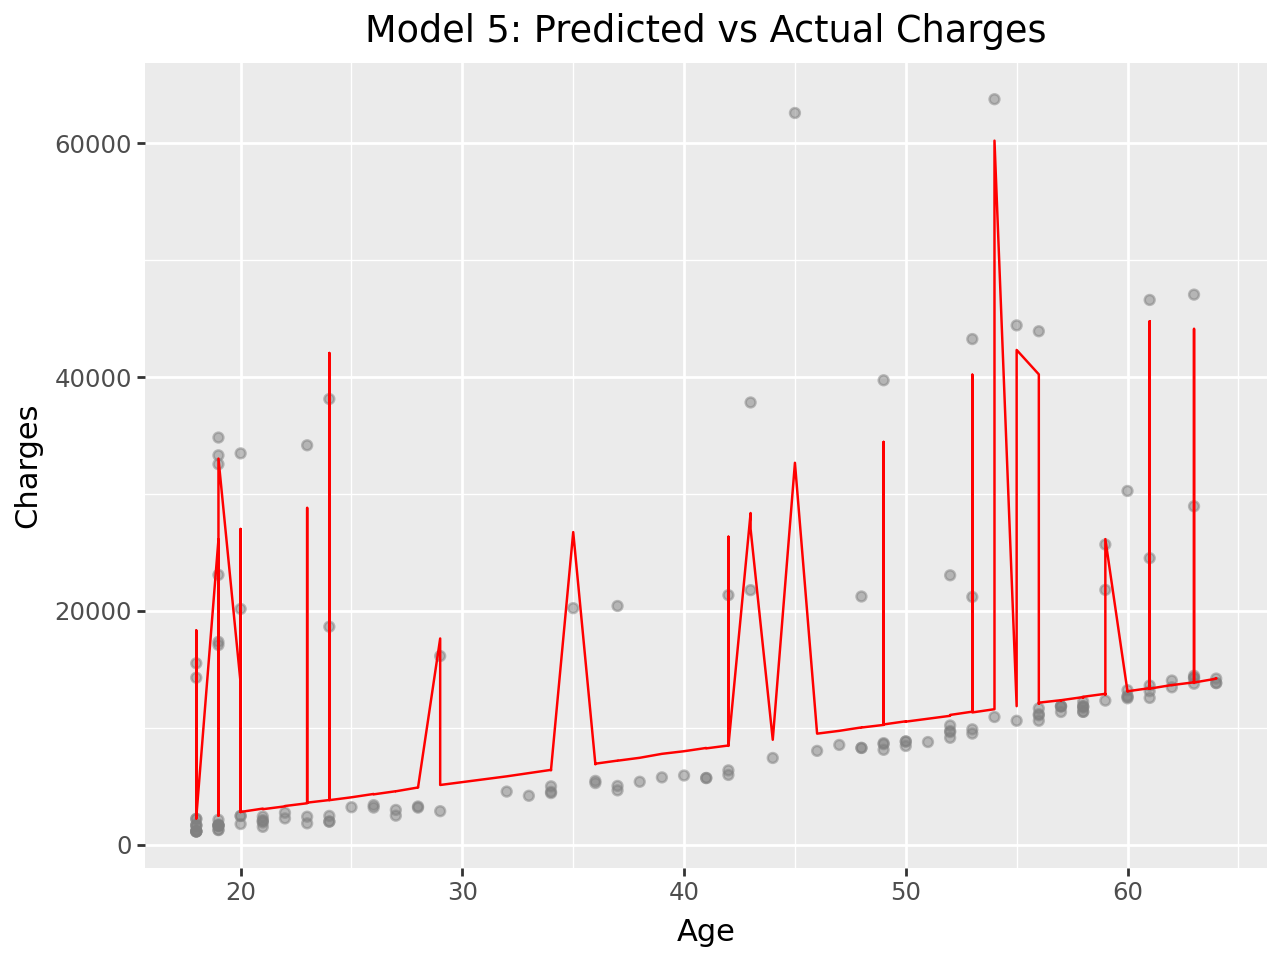

In [103]:

(ggplot(plot2, aes(x="age", y="charges"))
    + geom_point(alpha=0.5, color="gray")
    + geom_line(aes(y="y_hat"), color="red")
    + labs(
        title="Model 5: Predicted vs Actual Charges",
        x="Age",
        y="Charges"
    )
)

## Part Five: Full Exploration
Using any variables in this dataset, and any polynomial of those variables, find the model that best predicts on the new data after being fit on the original data.

Make a plot showing the residuals of your final chosen model.

In [110]:
# polynomials
insurance["age_sq"] = insurance["age"] ** 2
insurance["bmi_sq"] = insurance["bmi"] ** 2

insurance2["age_sq"] = insurance2["age"] ** 2
insurance2["bmi_sq"] = insurance2["bmi"] ** 2

In [111]:
# Model A: ~ age + bmi + smoker + age² + bmi²
X_trainA = insurance[["age", "bmi", "smoker_yes", "age_sq", "bmi_sq"]]
X_newA   = insurance2[["age", "bmi", "smoker_yes", "age_sq", "bmi_sq"]]
y_train  = insurance["charges"]
y_new    = insurance2["charges"]

modelA = LinearRegression()
modelA.fit(X_trainA, y_train)
yhat_newA = modelA.predict(X_newA)

mse_newA = mean_squared_error(y_new, yhat_newA)
print("MSE:", round(mse_newA, 2))

MSE: 35327847.56


In [112]:
# Model B: ~ (age + bmi)smoker + age² + bmi²
X_trainB = insurance[["age", "bmi", "smoker_yes", "age_sq", "bmi_sq", "age_smoker", "bmi_smoker"]]
X_newB   = insurance2[["age", "bmi", "smoker_yes", "age_sq", "bmi_sq", "age_smoker", "bmi_smoker"]]

modelB = LinearRegression()
modelB.fit(X_trainB, y_train)
yhat_newB = modelB.predict(X_newB)

mse_newB = mean_squared_error(y_new, yhat_newB)
print("MSE:", round(mse_newB, 2))

MSE: 21530779.45


In [113]:
# Model C: ∼ age + bmi + smoker + age² + bmi² + (age × bmi)
insurance["age_bmi"] = insurance["age"] * insurance["bmi"]
insurance2["age_bmi"] = insurance2["age"] * insurance2["bmi"]

X_trainC = insurance[["age", "bmi", "smoker_yes", "age_sq", "bmi_sq", "age_bmi"]]
X_newC   = insurance2[["age", "bmi", "smoker_yes", "age_sq", "bmi_sq", "age_bmi"]]
y_train  = insurance["charges"]
y_new    = insurance2["charges"]

modelC = LinearRegression()
modelC.fit(X_trainC, y_train)
yhat_trainC = modelC.predict(X_trainC)
yhat_newC   = modelC.predict(X_newC)

mse_newC = mean_squared_error(y_new, yhat_newC)
print("MSE:", round(mse_newC, 2))

MSE: 35502778.93


In [114]:
# Compare Models
print("Model A:", round(mse_newA, 2))
print("Model B:", round(mse_newB, 2))
print("Model C:", round(mse_newC, 2))

Model A: 35327847.56
Model B: 21530779.45
Model C: 35502778.93


In [125]:
# Plot Residuals
residuals = pd.DataFrame({
     "age": insurance2["age"],
    "charges": insurance2["charges"],
    "predicted": yhat_newB
})

In [127]:
residuals = residuals.sort_values("age")

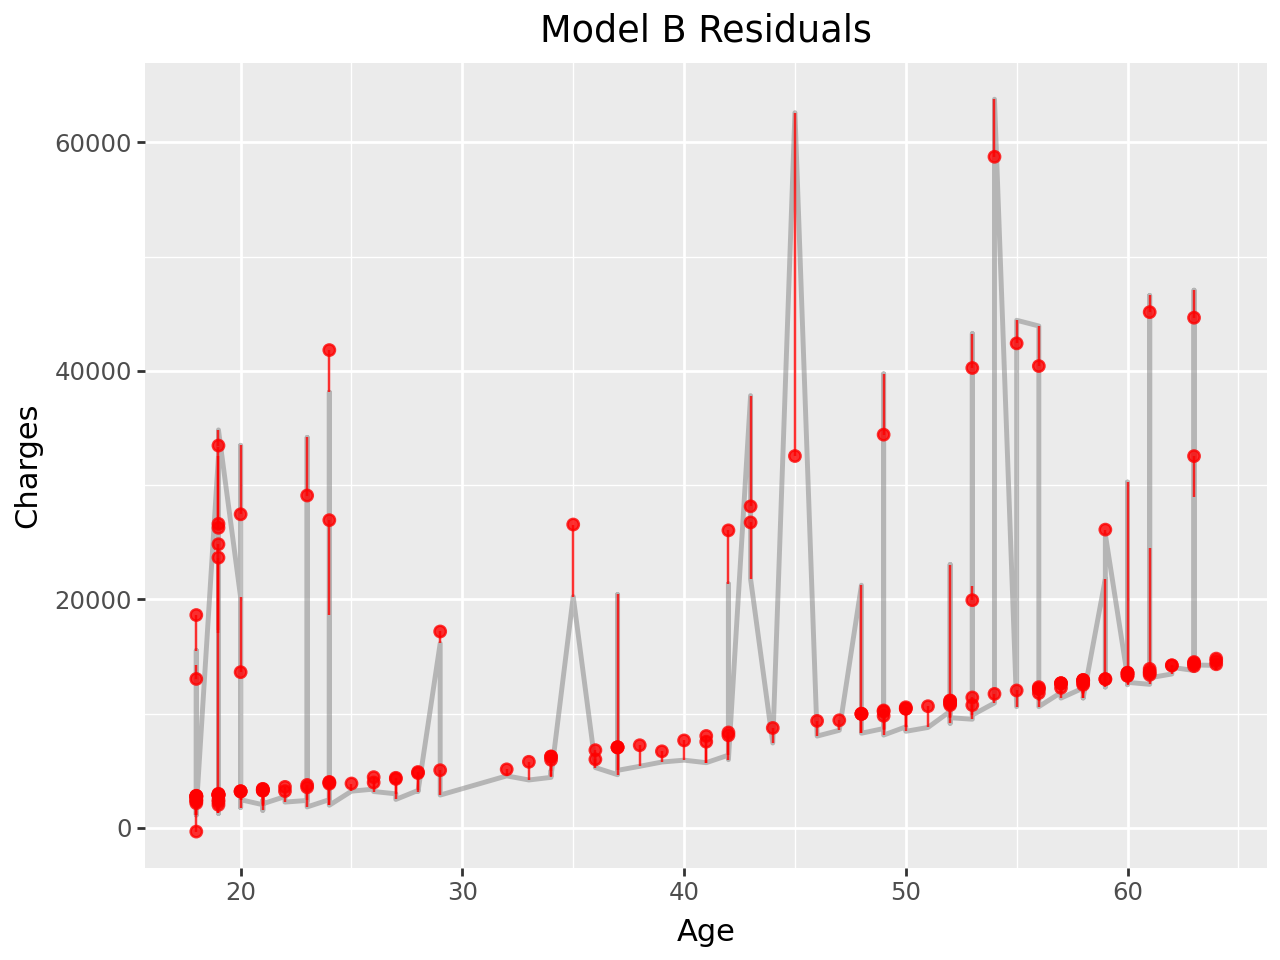

In [137]:
(ggplot(residuals, aes(x="age"))
    + geom_line(aes(y="charges"), color="gray", size=1, alpha=0.5)
    + geom_segment(
        aes(x="age", xend="age", y="predicted", yend="charges"),
        color="red", alpha=0.8
    )
    + geom_point(aes(y="predicted"), color="red", size=1.8, alpha=0.8)
    + labs(
        title="Model B Residuals",
        x="Age",
        y="Charges"
    )
)